In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Line plot
Useful for time-dependent data. Misleading when x is categorical.

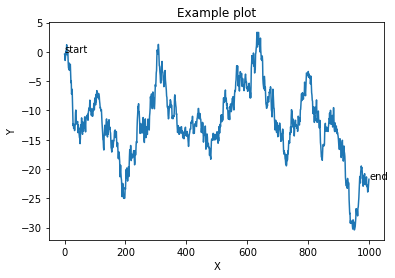

In [34]:
# Create data.
n = 1000
x = np.arange(n)
y = np.cumsum(np.random.randn(n))

# Main plot.
plt.plot(x, y)

# Optional format.
plt.title('Example plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.text(0, 0, 'start')
plt.text(n, y[-1], 'end')

plt.show() # Not really needed in interactive mode.

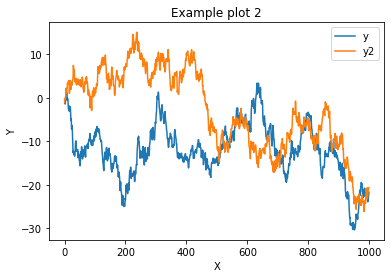

In [35]:
y2 = np.cumsum(np.random.randn(n))

plt.plot(x, y)
plt.plot(x, y2)

#plt.plot(x, y, 'g-', x, y2, 'r--') # Or keep adding x, y pairs as desired.

# Optional format.
plt.title('Example plot 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['y', 'y2']) # Number of items in legend needs to match the above x, y, pairs.

plt.show()

# Barplot
Useful for categorical (or even discrete) variables.

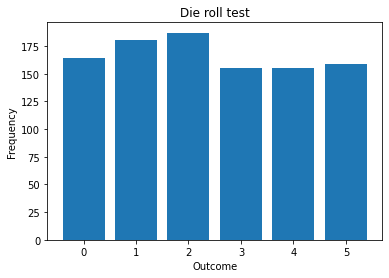

In [36]:
k = 6 # Sides in a die.
n = 1000 # Die rolls.
rolls = pd.Series(np.random.randint(k, size=n)) \
    .value_counts()

plt.bar(rolls.index, rolls)

# Optional format.
plt.title('Die roll test')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

plt.show()

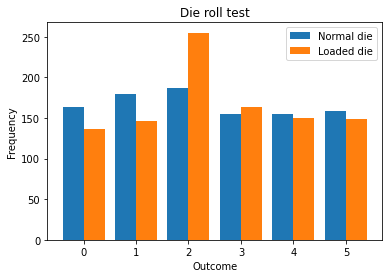

In [37]:
loaded_rolls = pd.Series(np.random.randint(k, size=int(n * 0.9))) \
    .append(pd.Series(np.repeat(2, int(n * 0.1)))) \
    .value_counts()

fig, ax = plt.subplots()
width = 0.4
ax.bar(rolls.index - (width / 2), rolls, width=width)
ax.bar(loaded_rolls.index + (width / 2), loaded_rolls, width=width)

# Optional format.
plt.title('Die roll test')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend(['Normal die', 'Loaded die'])

plt.show()

# Scatterplot

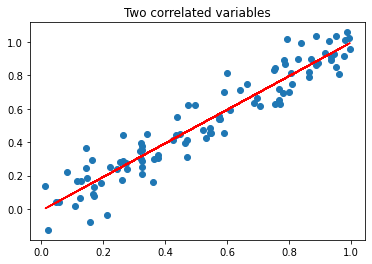

In [38]:
n = 100
x = np.random.uniform(size=n)
y = x + np.random.randn(n) / 10

plt.scatter(x, y)

# Add trend line with sklearn.
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#x_array = x.reshape((n, 1))
#model.fit(x_array, y)
#plt.plot(x, model.predict(x_array), 'r')

# Or with NumPy.
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r')

plt.title('Two correlated variables')

plt.show()

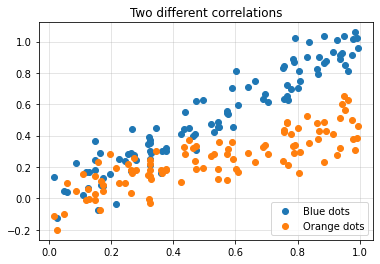

In [39]:
y2 = 0.5 * x + np.random.randn(n) / 10

fig, ax = plt.subplots()
plt.scatter(x, y)
plt.scatter(x, y2)

ax.set_axisbelow(True) # Make grid lines appear behind, instead of on top of dots.
plt.grid(True, alpha=0.4)
plt.title('Two different correlations')
plt.legend(['Blue dots', 'Orange dots'], loc='lower right')

plt.show()

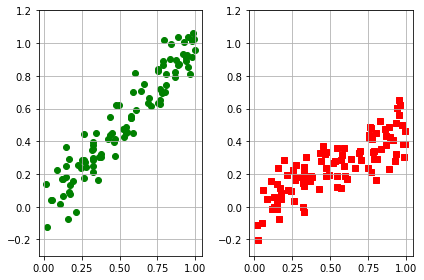

In [43]:
fig, ax = plt.subplots(1, 2) # Number of rows and columns.
ax[0].scatter(x, y, color='g')
ax[1].scatter(x, y2, color='r', marker='s')
ax[0].set_ylim([-0.3, 1.2])
ax[1].set_ylim([-0.3, 1.2])

ax[0].grid(True)
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Why do they seem to have the same slope?

# Histogram
Frequency by interval. Not the same as a barplot (which can show frequency per category).

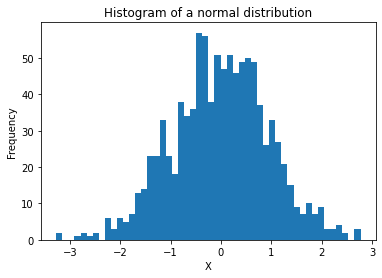

In [49]:
n = 1000
x = np.random.randn(n)

plt.hist(x, bins=50) # Optional bins argument.

plt.title('Histogram of a normal distribution')
plt.xlabel('X')
plt.ylabel('Frequency')

plt.show()

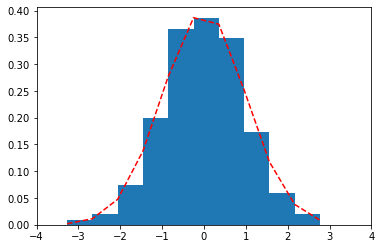

In [52]:
import scipy.stats as sp

n, bins, patches = plt.hist(x, bins = 10, density=True)
plt.plot(bins, sp.norm.pdf(bins), 'r--')

plt.xlim([-4, 4])

plt.show()

# Boxplot
A compact way of displaying distributions.

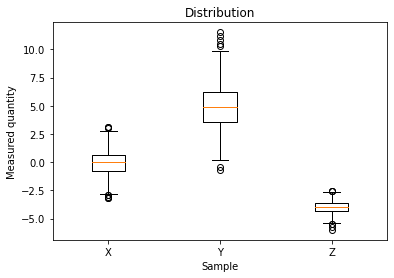

In [53]:
n = 1000
x = np.random.randn(n) * 1.0 + 0
y = np.random.randn(n) * 2.0 + 5
z = np.random.randn(n) * 0.5 + (-4)

plt.boxplot([x, y, z], labels=['X', 'Y', 'Z'])

plt.title('Distribution')
plt.xlabel('Sample')
plt.ylabel('Measured quantity')

plt.show()

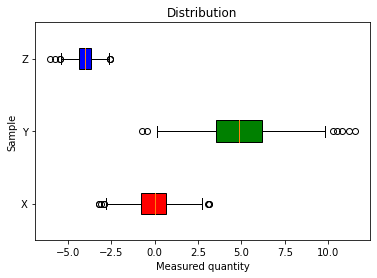

In [55]:
b = plt.boxplot([x, y, z],
                vert=False, # Not vertical.
                patch_artist=True, # Fill with color.
                labels=['X', 'Y', 'Z'])

b['boxes'][0].set_facecolor('r')
b['boxes'][1].set_facecolor('g')
b['boxes'][2].set_facecolor('b')

plt.title('Distribution')
plt.ylabel('Sample')
plt.xlabel('Measured quantity')

plt.show()

# Pair plot
We have many variables and we want to see scatterplots for all variable pairs at once.

In [59]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, index=iris.target_names[iris.target], columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0
virginica,6.2,3.4,5.4,2.3


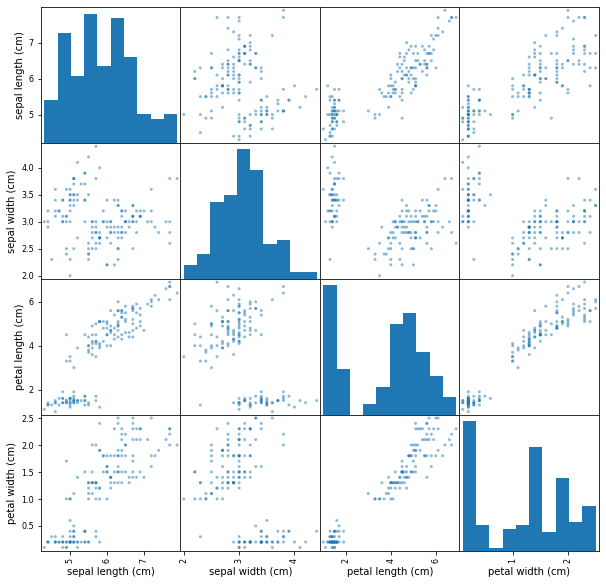

In [62]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris_df, figsize=(10, 10))#, diagonal='kde')

plt.show()

# Time series
Just a line plot, but pandas allows us to work with the convenient DatetimeIndex type.

In [63]:
air = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')
air

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


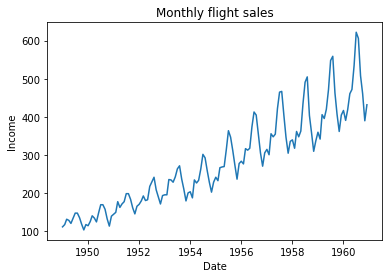

In [64]:
air.index = pd.DatetimeIndex(air['date'], freq='MS') # pandas can infer the frequency. In this case, Month Start.

#air.plot() # A DataFrame method.
plt.plot(air['value'])

plt.title('Monthly flight sales')
plt.xlabel('Date')
plt.ylabel('Income')

plt.show()

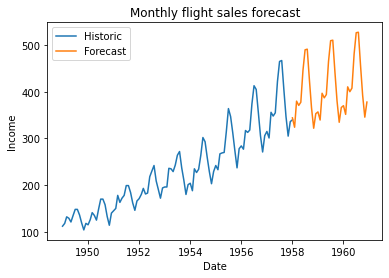

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

date = '1958-01-01'
model = SARIMAX(air['value'][:date], seasonal_order=(1,1,1,12))
fit = model.fit()

plt.plot(air['value'][:date])
plt.plot(fit.predict(start=date, end=air.index[-1]))

plt.title('Monthly flight sales forecast')
plt.xlabel('Date')
plt.ylabel('Income')
plt.legend(['Historic', 'Forecast'])

plt.show()

# 3D plot

In [67]:
from mpl_toolkits.mplot3d import Axes3D

# Load and format data.
volcano = pd.read_csv('https://github.com/plotly/datasets/raw/master/volcano.csv')
nrow, ncol = volcano.shape
volcano.columns = range(ncol)
volcano = volcano.melt().reset_index()
volcano.columns = ['x', 'y', 'z']
volcano['x'] = volcano.index % nrow

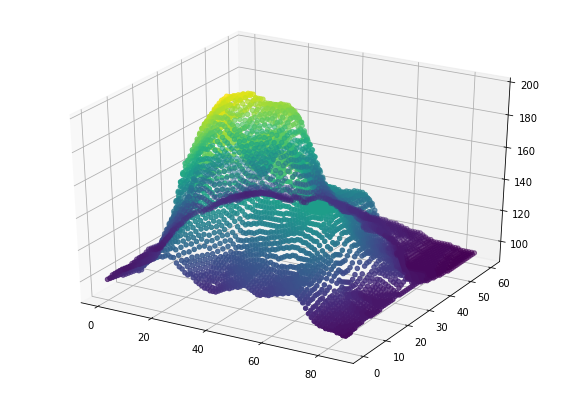

In [71]:
fig = plt.figure(figsize=[10, 7])
ax = fig.add_subplot(projection='3d')
ax.scatter(volcano['x'], volcano['y'], volcano['z'], c=volcano['z'], cmap='viridis')

plt.show()

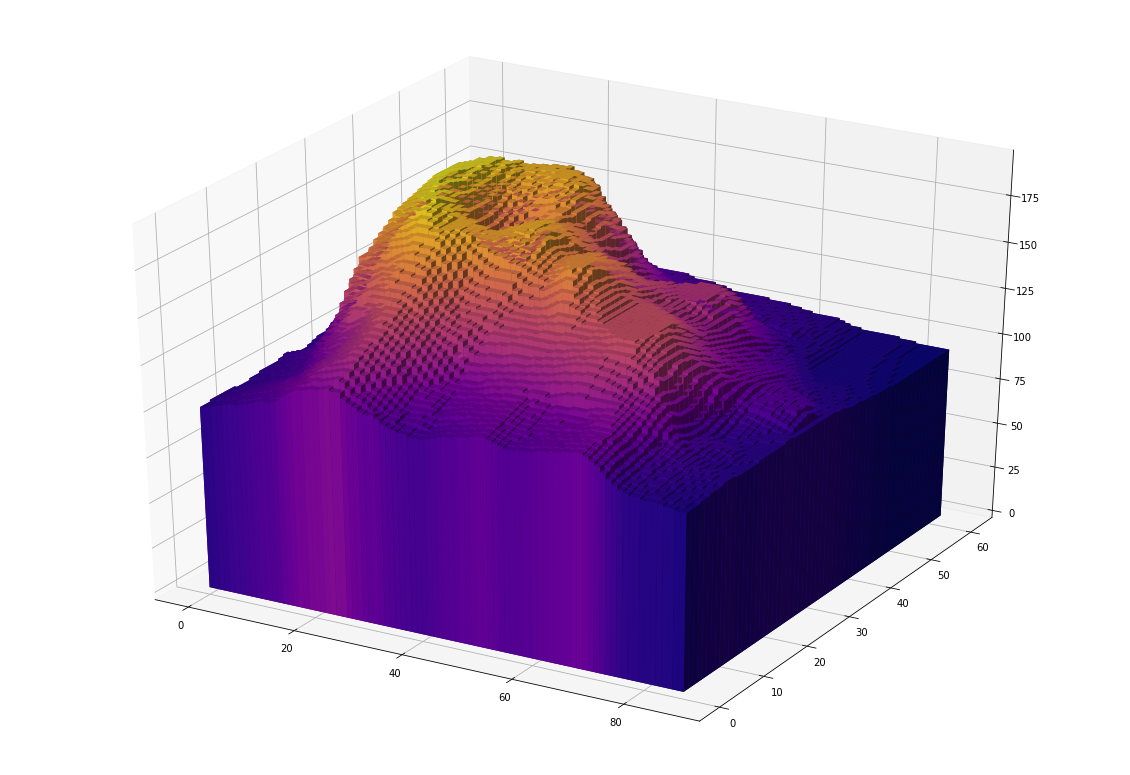

In [58]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# Create color map.
offset = volcano['z'] + np.abs(volcano['z'].min())
fracs = offset.astype(float) / offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.plasma(norm(fracs))

fig = plt.figure(figsize=[20, 14])
ax = fig.add_subplot(projection='3d')
ax.bar3d(volcano['x'], # x
         volcano['y'], # y
         0,            # bottom
         1,            # depth
         1,            # width
         volcano['z'], # top
         shade=True,
         color=colors)

plt.show()

# Save to disk
Do it in the same code cell and before calling `plt.show()`.

In [ ]:
plt.savefig('figure.png') # Best for flat colors like graphs.
plt.savefig('figure.jpg') # Best for complex colors like pictures.